In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
from utils.streams import populate_streams

%matplotlib inline
#%matplotlib qt

plt.style.use('ggplot')


In [2]:
stream_root_folder = r"C:\Users\neurogears\Desktop\EC_datasets\EmpaticaLDRBenchmark2022_09_26_18_06_45"

In [3]:
#Load necessary streams for the test

streams = populate_streams(root = stream_root_folder, autoload=False)#make sure autoload is set to "False"
streams.Accelerometer.load()
streams.BioData.Accelarometer.load()


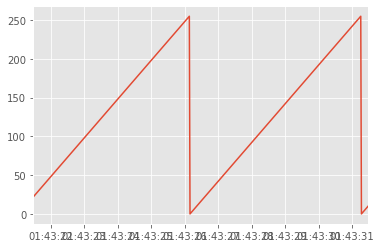

(53745, 24) (53746, 1)


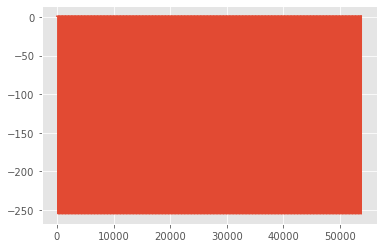

[-255.    1.]


In [20]:
streams.Accelerometer.data
streams.BioData.Accelarometer.data
plt.figure()
plt.plot(streams.BioData.Accelarometer.data)
plt.xlim(streams.BioData.Accelarometer.data.index[0], streams.BioData.Accelarometer.data.index[500])
plt.show()


print(streams.Accelerometer.data.shape,
streams.BioData.Accelarometer.data.shape
)

plt.figure()
plt.plot(np.diff(streams.BioData.Accelarometer.data.Value.astype(float)))
plt.show()
print(np.unique(np.diff(streams.BioData.Accelarometer.data.Value.astype(float))))

assert np.all(streams.Accelerometer.data.index.values == streams.BioData.Accelarometer.data.index.values[:-1])

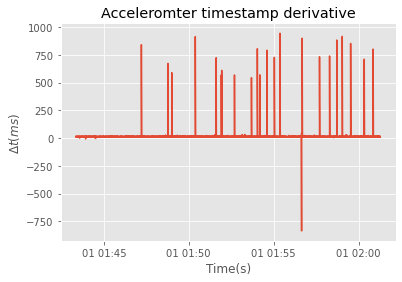

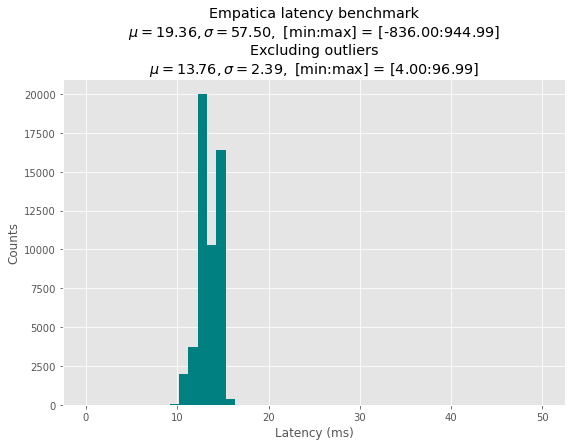

In [33]:

delta_t = streams.Accelerometer.data.index - streams.Accelerometer.data['SoftwareTimestamp']
delta_t = -delta_t / np.timedelta64(1, 'ms')
plt.figure()

plt.plot(delta_t)
plt.ylabel('$\Delta t (ms)$')
plt.xlabel('Time(s)')
plt.title('Acceleromter timestamp derivative')
plt.show()

#delta_t[(delta_t > 900) or (delta_t > 900)] = np.NaN

plt.figure(figsize= (9,6))
plt.hist(delta_t, bins = np.linspace(0, 50, 50), color= "Teal")
plt.xlabel('Latency (ms)')
plt.ylabel('Counts')
txt = (f'Empatica latency benchmark\n$\mu = {np.mean(delta_t):.2f}, \sigma = {np.std(delta_t):.2f},$ [min:max] = [{np.min(delta_t):.2f}:{np.max(delta_t):.2f}]')
delta_t = delta_t[(delta_t > 0) & (delta_t < 100)]
plt.title(txt + "\n" + f'Excluding outliers\n$\mu = {np.mean(delta_t):.2f}, \sigma = {np.std(delta_t):.2f},$ [min:max] = [{np.min(delta_t):.2f}:{np.max(delta_t):.2f}]')

plt.show()